In [13]:
import pandas as pd
from ydata_profiling import ProfileReport
from google.cloud import bigquery


In [21]:
%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted")
#“rocket,” “mako,” “flare,” “crest,” “Spectral,” etc.

In [7]:
def create_report(df, report_name):
    profile = ProfileReport(df, title="Profiling Report - " + report_name)
    profile.to_file("report_" + report_name + ".html")

In [5]:
client = bigquery.Client(project="correlion")

query = """
    SELECT *
    FROM `correlion.olist_clean.order_reviews_aspect_geo`
    LIMIT 1000
"""

df = client.query(query).to_dataframe()

df.head()

/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,product_id,review_id,review_score,product_category_name_en,review_comment_message,review_comment_message_en,review_year,review_month,review_month_date,city,delivery_score,product_quality_score,customer_service_score,refund_process_score,packaging_condition_score
0,c5e9693041e519fd6e2ebde0d76cc1ad,2015549a3e9abdcd312271e320e5e261,1,small_appliances,Recebi o filtro todo quebrado,I received the filter completely broken,2017,2,2017-02-01,rio de janeiro,0.0,-1.0,0.0,0.0,-1.0
1,6bbe55cf8f85c87b6eebb775a53402f4,6121d90ea99ee4153fdab6773aacff41,1,tablets_printing_image,Não gostei da,I didn't like it.,2017,3,2017-03-01,teresina,0.0,0.0,0.0,0.0,0.0
2,a853bf1a5f8d9f04f5df123168164720,497a18375a38f0cb840b5d42aee7454f,1,books_imported,Ja passou o prazo de entrega \nE o produto ain...,The delivery deadline has passed \nAnd the pro...,2017,3,2017-03-01,nova serrana,-1.0,0.0,0.0,0.0,0.0
3,e40fa115d27ea4a80bf2136d5f0cfcd7,11b54d6b032c22b3219b4c3030795d95,1,home_appliances,Produto com defeito.,Defective product.,2017,3,2017-03-01,joinville,0.0,-1.0,0.0,0.0,0.0
4,a0fe1efb855f3e786f0650268cd77f44,e60ec3142c2333a73f1c8f0da8045f4b,1,agro_industry_and_commerce,Realizei a compra de três cabos e recebi somen...,I bought three cables and only received one. H...,2017,3,2017-03-01,curitiba,0.0,0.0,0.0,-1.0,0.0


In [8]:
df.head()

,product_id,review_id,review_score,product_category_name_en,review_comment_message,review_comment_message_en,review_year,review_month,review_month_date,city,delivery_score,product_quality_score,customer_service_score,refund_process_score,packaging_condition_score
0,c5e9693041e519fd6e2ebde0d76cc1ad,2015549a3e9abdcd312271e320e5e261,1,small_appliances,Recebi o filtro todo quebrado,I received the filter completely broken,2017,2,2017-02-01,rio de janeiro,0.0,-1.0,0.0,0.0,-1.0
1,6bbe55cf8f85c87b6eebb775a53402f4,6121d90ea99ee4153fdab6773aacff41,1,tablets_printing_image,Não gostei da,I didn't like it.,2017,3,2017-03-01,teresina,0.0,0.0,0.0,0.0,0.0
2,a853bf1a5f8d9f04f5df123168164720,497a18375a38f0cb840b5d42aee7454f,1,books_imported,Ja passou o prazo de entrega \nE o produto ain...,The delivery deadline has passed \nAnd the pro...,2017,3,2017-03-01,nova serrana,-1.0,0.0,0.0,0.0,0.0
3,e40fa115d27ea4a80bf2136d5f0cfcd7,11b54d6b032c22b3219b4c3030795d95,1,home_appliances,Produto com defeito.,Defective product.,2017,3,2017-03-01,joinville,0.0,-1.0,0.0,0.0,0.0
4,a0fe1efb855f3e786f0650268cd77f44,e60ec3142c2333a73f1c8f0da8045f4b,1,agro_industry_and_commerce,Realizei a compra de três cabos e recebi somen...,I bought three cables and only received one. H...,2017,3,2017-03-01,curitiba,0.0,0.0,0.0,-1.0,0.0


In [9]:
create_report(df, "aspect")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x11ec18500, file "/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df[['product_category_name_en', 'review_comment_message_en', 'review_month_date', 'city', 'product_quality_score', 'customer_service_score']]

,product_category_name_en,review_comment_message_en,review_month_date,city,product_quality_score,customer_service_score
0,small_appliances,I received the filter completely broken,2017-02-01,rio de janeiro,-1.0,0.0
1,tablets_printing_image,I didn't like it.,2017-03-01,teresina,0.0,0.0
2,books_imported,The delivery deadline has passed \nAnd the pro...,2017-03-01,nova serrana,0.0,0.0
3,home_appliances,Defective product.,2017-03-01,joinville,-1.0,0.0
4,agro_industry_and_commerce,I bought three cables and only received one. H...,2017-03-01,curitiba,0.0,0.0
...,...,...,...,...,...,...
995,home_construction,I received the product but it came with a brok...,2017-05-01,fernandopolis,-1.0,0.0
996,luggage_accessories,The product has not arrived yet!,2017-03-01,belo horizonte,0.0,0.0
997,luggage_accessories,I received a different product than the one I ...,2017-04-01,jacobina,0.0,-0.5
998,luggage_accessories,I didn't like it took too long it exceeded the...,2017-05-01,guarulhos,0.0,0.0


# Distribution of Aspect Scores

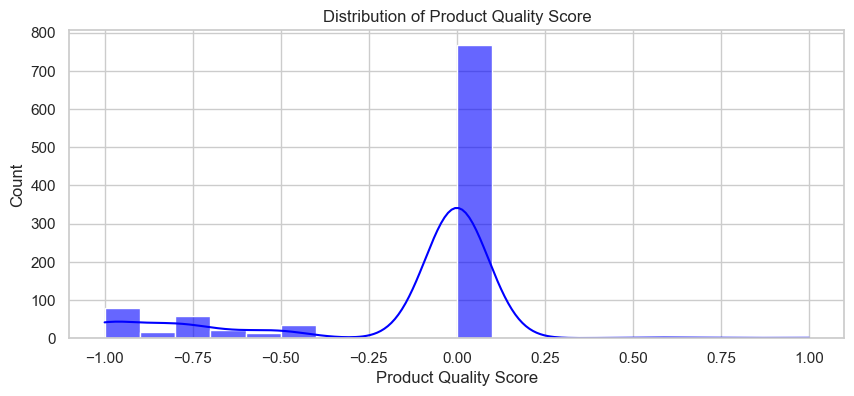

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Histogram + KDE for product_quality_score
sns.histplot(data=df, x="product_quality_score", kde=True, color="blue", alpha=0.6, bins=20)
plt.title("Distribution of Product Quality Score")
plt.xlabel("Product Quality Score")
plt.ylabel("Count")
plt.show()

# Boxplot of Scores by Product Category

/var/folders/by/9rlgy7dn18s8rh2tjztwb6jc0000gn/T/ipykernel_13567/576689033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered, x="product_category_name_en", y="product_quality_score", palette="Set3")


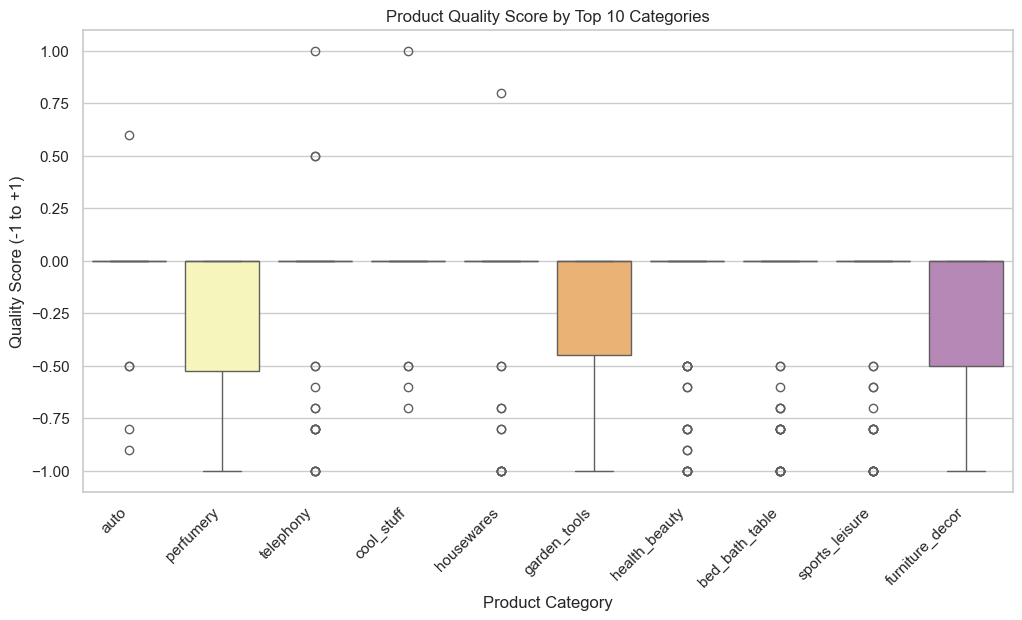

In [23]:
top_categories = (
    df["product_category_name_en"]
    .value_counts()
    .head(10)  # pick top N categories to keep the plot tidy
    .index
)

filtered = df[df["product_category_name_en"].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x="product_category_name_en", y="product_quality_score", palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.title("Product Quality Score by Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Quality Score (-1 to +1)")
plt.show()

# Heatmap: Product Quality vs. Customer Service

/var/folders/by/9rlgy7dn18s8rh2tjztwb6jc0000gn/T/ipykernel_13567/678898422.py:8: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


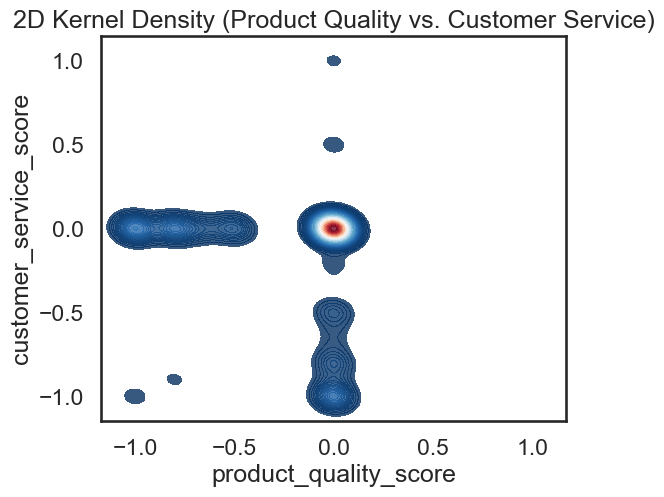

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")  # or "whitegrid"
sns.set_context("talk") # slightly larger font sizes

plt.figure(figsize=(6,5))
sns.kdeplot(
    data=df,
    x="product_quality_score",
    y="customer_service_score",
    fill=True,           
    cmap="RdBu_r",         # or "rocket", "viridis", "plasma", "RdBu_r", etc.
    levels=40,          # more levels => smoother color transitions
    bw_adjust=0.5,
    shade_lowest=False, # omit the darkest shading where density is near 0
    alpha=0.8           # slight transparency if you want to see gridlines
)
plt.title("2D Kernel Density (Product Quality vs. Customer Service)")
plt.show()

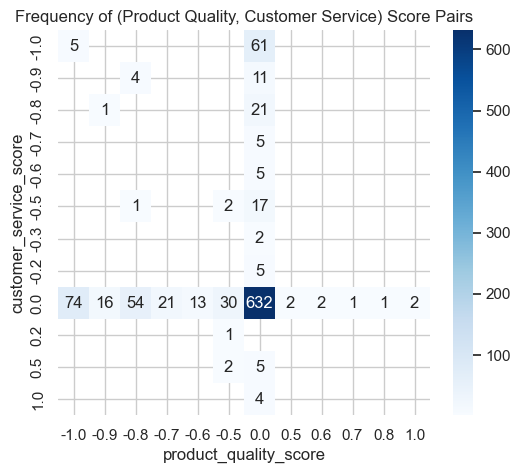

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

freq_df = (
  df.groupby(["product_quality_score", "customer_service_score"])
    .size()
    .reset_index(name="count")
)

freq_pivot = freq_df.pivot(
  index="customer_service_score",
  columns="product_quality_score",
  values="count"
)

plt.figure(figsize=(6,5))
sns.heatmap(freq_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Frequency of (Product Quality, Customer Service) Score Pairs")
plt.show()

# Heatmap of Average Scores by Category & City

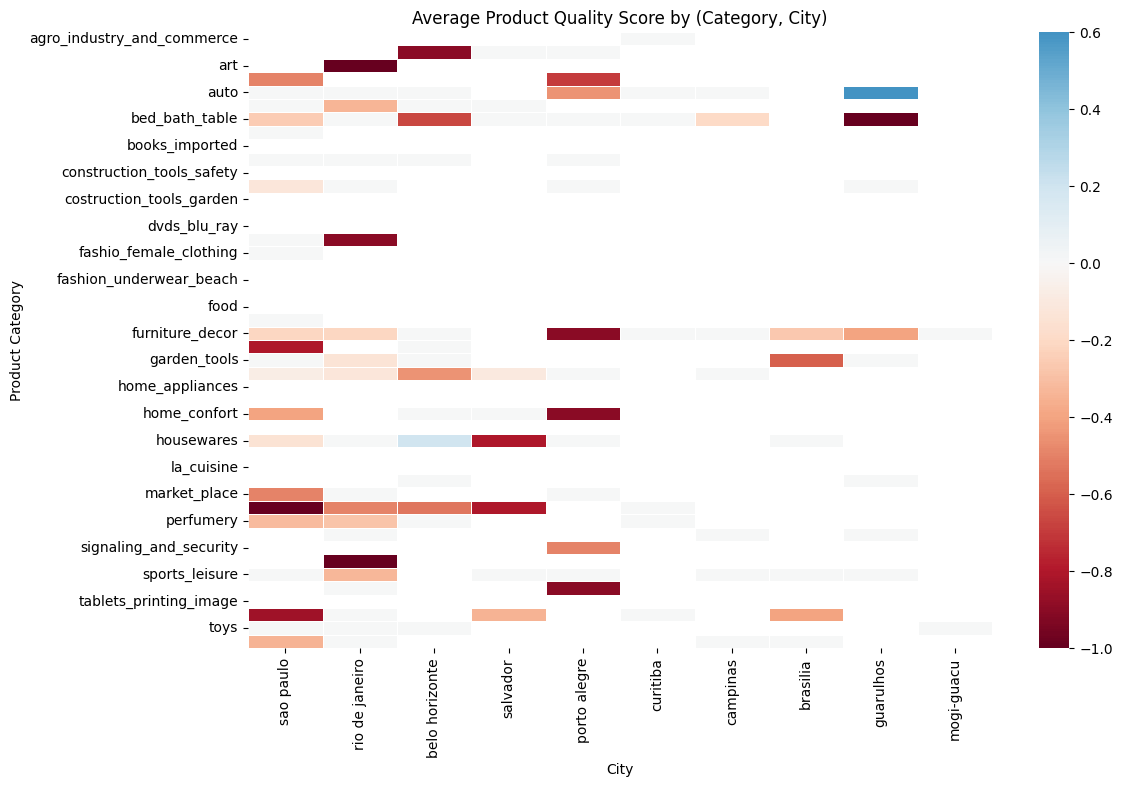

In [17]:
import numpy as np

pivot_df = (
    df
    .groupby(["product_category_name_en", "city"], as_index=False)
    .agg({"product_quality_score": "mean"})
    .pivot(index="product_category_name_en", columns="city", values="product_quality_score")
)

# Because you might have many cities, let's pick top 10 by count
top10_cities = df["city"].value_counts().head(10).index
pivot_df = pivot_df[top10_cities]  # keep columns only for top 10 cities

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=False, cmap="RdBu", center=0, linewidths=.5)
plt.title("Average Product Quality Score by (Category, City)")
plt.xlabel("City")
plt.ylabel("Product Category")
plt.show()

# Trend Over Time

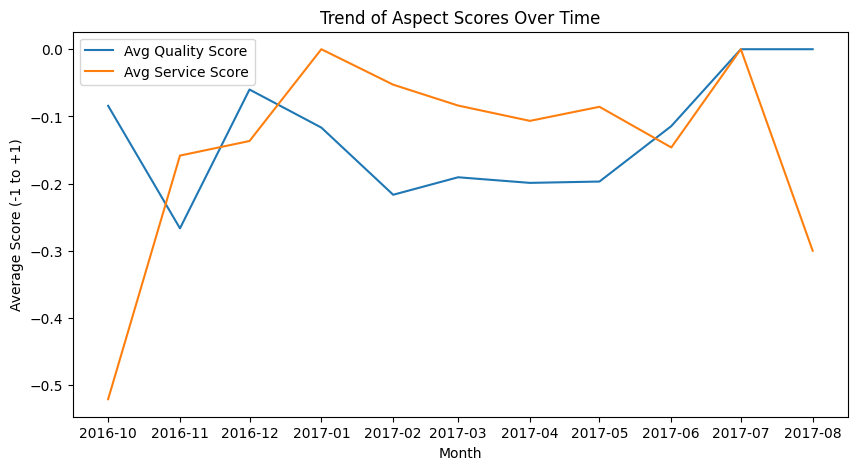

In [18]:
df["review_month_date"] = pd.to_datetime(df["review_month_date"])

time_df = (
    df
    .groupby("review_month_date", as_index=False)
    .agg(avg_quality=("product_quality_score", "mean"), avg_service=("customer_service_score", "mean"))
)

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_df, x="review_month_date", y="avg_quality", label="Avg Quality Score")
sns.lineplot(data=time_df, x="review_month_date", y="avg_service", label="Avg Service Score")
plt.title("Trend of Aspect Scores Over Time")
plt.xlabel("Month")
plt.ylabel("Average Score (-1 to +1)")
plt.legend()
plt.show()

# Pairplot (if you add more aspect columns)

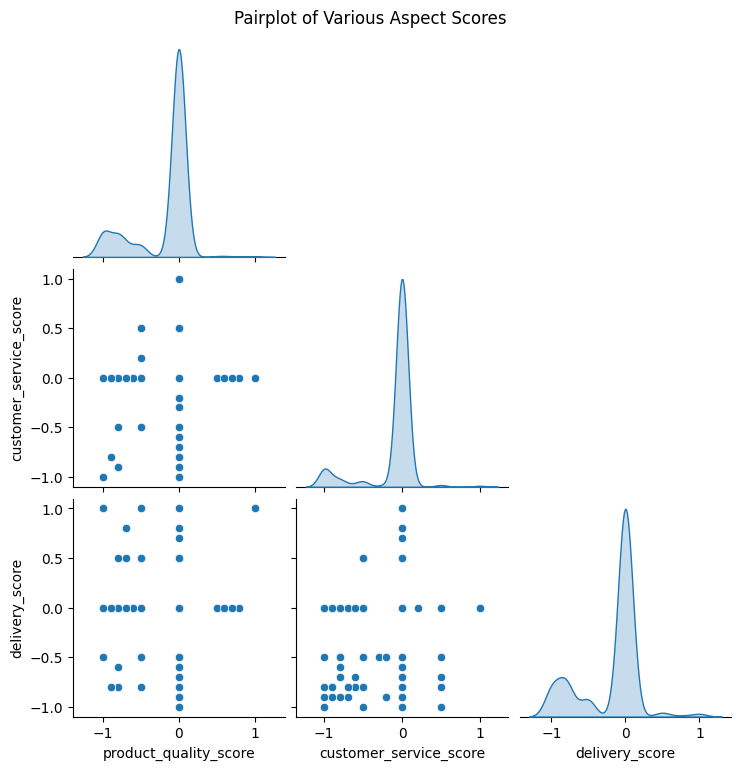

In [19]:
sns.pairplot(
    df[["product_quality_score", "customer_service_score", "delivery_score"]].dropna(),
    diag_kind="kde",
    corner=True
)
plt.suptitle("Pairplot of Various Aspect Scores", y=1.02)
plt.show()

/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)


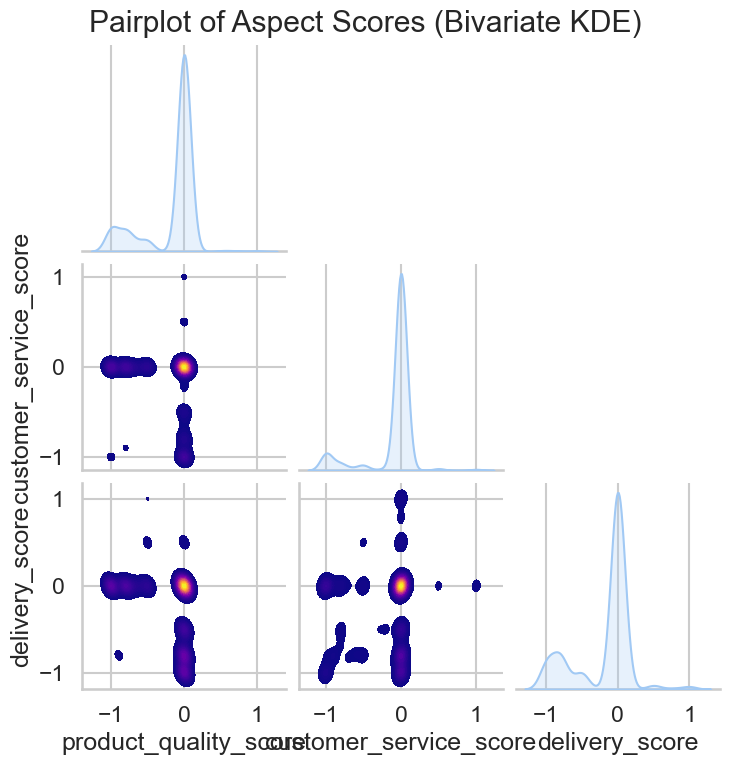

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df[["product_quality_score", "customer_service_score", "delivery_score"]].dropna()

sns.set_style("whitegrid")
g = sns.pairplot(
    data=df_subset,
    kind="kde",           # bivariate KDE on off-diagonals
    diag_kind="kde",      # 1D KDE on diagonals
    corner=True,          # lower triangle only
    plot_kws={
        "fill": True,           # fill the contours
        "levels": 30,           # more contour lines for that "topographic" look
        "cmap": "plasma",         # or your favorite colormap
        "shade_lowest": False,  # skip the darkest outer area
        "bw_adjust": 0.5,       # tweak smoothing
    }
)

# Adjust the PairGrid figure
g.fig.suptitle("Pairplot of Aspect Scores (Bivariate KDE)", y=1.02)
plt.show()